In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

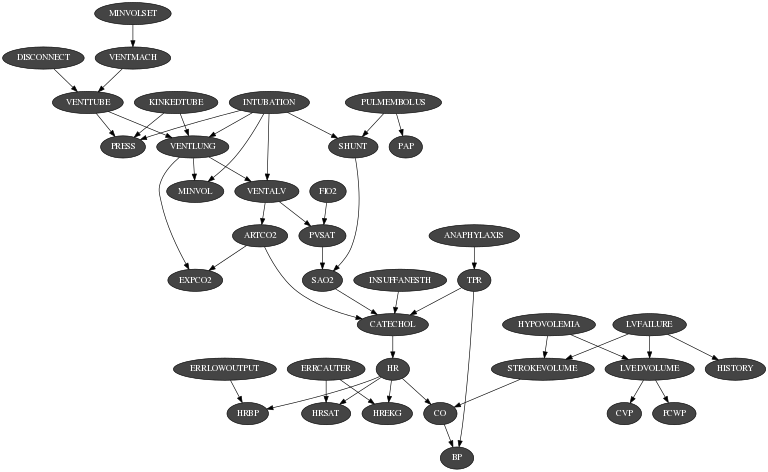

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn=gum.loadBN("../resources/alarm.dsl")
gnb.showBN(bn,size='8')

### First, an exact inference.

In [3]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
print(bn.variable(2))
print(ie.posterior(2))

INTUBATION<NORMAL,ESOPHAGEAL,ONESIDED>
<INTUBATION:NORMAL> :: 0.92 /<INTUBATION:ESOPHAGEAL> :: 0.03 /<INTUBATION:ONESIDED> :: 0.05


<h3>Gibbs inference with default parameters</h3>

Gibbs inference iterations can be stopped 
<ul>
<li> by the value of error (epsilon)</li>
<li> by the rate of change of epsilon (MinEpsilonRate)</li>
<li> by the number of iteration (MaxIteration)</li>
<li> by the duration of the algorithm (MaxTime)</li>
</ul>

In [4]:
ie2=gum.GibbsInference(bn)
ie2.makeInference()

print(bn.variable(2))
print(ie2.posterior(2))
print(ie2.messageApproximationScheme())

INTUBATION<NORMAL,ESOPHAGEAL,ONESIDED>
<INTUBATION:NORMAL> :: 0.922583 /<INTUBATION:ESOPHAGEAL> :: 0.028754 /<INTUBATION:ONESIDED> :: 0.0486629
stopped with epsilon=6.93147e-05


With default parameters, this inference has been stopped by a low value of epsilon.

### Changing parameters

In [5]:
ie2=gum.GibbsInference(bn)

ie2.setMaxIter(30000)
ie2.makeInference()

print(bn.variable(2))
print(ie2.posterior(2))
print(ie2.messageApproximationScheme())

INTUBATION<NORMAL,ESOPHAGEAL,ONESIDED>
<INTUBATION:NORMAL> :: 0.954164 /<INTUBATION:ESOPHAGEAL> :: 9.83607e-05 /<INTUBATION:ONESIDED> :: 0.0457377
stopped with max iteration=30000


In [6]:
ie2=gum.GibbsInference(bn)

ie2.setMaxTime(5)
ie2.makeInference()

print(bn.variable(2))
print(ie2.posterior(2))
print(ie2.messageApproximationScheme())

INTUBATION<NORMAL,ESOPHAGEAL,ONESIDED>
<INTUBATION:NORMAL> :: 0.95998 /<INTUBATION:ESOPHAGEAL> :: 0.0230416 /<INTUBATION:ONESIDED> :: 0.0169789
stopped with timeout=5


### Visualisation of the inference

INTUBATION<NORMAL,ESOPHAGEAL,ONESIDED>
<INTUBATION:NORMAL> :: 0.93493 /<INTUBATION:ESOPHAGEAL> :: 0.0250141 /<INTUBATION:ONESIDED> :: 0.0400563


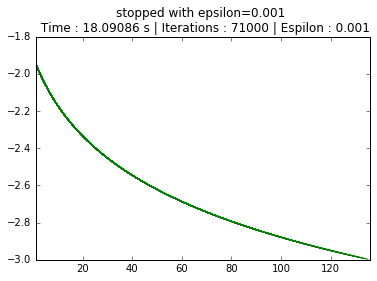

In [7]:
ie2=gum.GibbsInference(bn)

ie2.setEpsilon(1e-3)
gnb.animApproximationScheme(ie2)
ie2.makeInference()

print(bn.variable(2))
print(ie2.posterior(2))